### 1. 

En el archivo "logistic_regression_df_class" hemos visto un ejemplo multiclase. Realiza un análisis con regresión linear multinominal teniendo como target la columna "duración". Es decir, averigua cuánto aumentan o disminuyen la duración cuando se aumenta una unidad los valores de las demás columnas.

- ¿Qué acierto tiene? (score)
- ¿Cuál es el RMSE? ¿Dirías que es un valor alto?
- Viendo la matriz de correlación, ¿tienen coherencia los resultados de la regresión?
- ¿Es la regresión un buen método para este dataset?

# Pista: X = todas las columnas menos duración, y = columna duración :) y sí, da un score bajito, ¿por qué? eso os lo dejo a vosotros

In [26]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics
import seaborn as sns
sns.set_style('whitegrid')

In [2]:
multi = pd.read_csv("../data/usuarios_win_mac_lin.csv")
multi

,duracion,paginas,acciones,valor,clase
0,7.0,2,4,8,2
1,21.0,2,6,6,2
2,57.0,2,4,4,2
3,101.0,3,6,12,2
4,109.0,2,6,12,2
...,...,...,...,...,...
165,13.0,1,7,42,0
166,12.0,1,2,6,0
167,13.0,1,3,9,0
168,13.0,1,7,28,0


In [3]:
multi.columns

Index(['duracion', 'paginas', 'acciones', 'valor', 'clase'], dtype='object')

In [4]:
X = multi[['paginas', 'acciones', 'valor', 'clase']]
y = multi['duracion']

In [5]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
lm = LinearRegression(n_jobs=-1)
lm.fit(X_train, y_train)

LinearRegression(n_jobs=-1)

In [6]:
print(lm.intercept_)

10.574958264025994


In [7]:
lm.coef_

array([27.46000474,  4.08038954, -0.57627197, 30.0295544 ])

In [8]:
coeff_df = pd.DataFrame(lm.coef_, X.columns, columns=['Coefficient'])
coeff_df

,Coefficient
paginas,27.460005
acciones,4.080390
valor,-0.576272
clase,30.029554


**Interpreting the coefficients:
**
- Holding all other features fixed, a 1 unit increase in **paginas** is associated with an **increase of 27.46 duracion units**.
- Holding all other features fixed, a 1 unit increase in **acciones** is associated with an **increase of 4.08 duracion units**.
- Holding all other features fixed, a 1 unit increase in **valor** is associated with an **decrease of 0.57 duracion units**.
- Holding all other features fixed, a 1 unit increase in **clase** is associated with an **increase of 30 duracion units**. (Linux is the fastest)

1. ¿Qué acierto tiene? (score)

In [9]:
lm.score(X_train, y_train) *100

8.951129183475437

In [10]:
lm.score(X_test, y_test) *100

13.584518203103201

2. ¿Cuál es el RMSE? ¿Dirías que es un valor alto?

# IN REGRESSION, ITS MORE LOGIC TO USE ERRORS THAN SCORES

In [16]:
predictions = lm.predict(X_test)

In [17]:
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))

RMSE: 181.01229551197122


In [22]:
print(len(multi['duracion']))
len(multi['duracion'].unique())

170


87

In [24]:
a = multi['duracion'].unique()
a.sort()

In [25]:
a

array([  1.   ,   1.064,   1.088,   1.105,   1.169,   1.284,   1.294,
         1.401,   1.425,   1.478,   1.59 ,   2.   ,   2.041,   2.091,
         2.695,   3.085,   7.   ,   9.   ,  10.   ,  11.   ,  12.   ,
        13.   ,  14.   ,  15.   ,  20.   ,  21.   ,  23.   ,  29.   ,
        30.   ,  31.   ,  33.   ,  49.   ,  50.   ,  51.   ,  54.   ,
        57.   ,  68.   ,  74.   ,  85.   ,  86.   ,  87.   ,  89.   ,
        93.   , 101.   , 105.   , 109.   , 112.   , 116.   , 117.   ,
       125.   , 133.   , 145.   , 146.   , 152.   , 162.   , 170.   ,
       195.   , 208.   , 217.   , 219.   , 230.   , 235.   , 257.   ,
       266.   , 275.   , 278.   , 293.   , 304.   , 319.   , 335.   ,
       355.   , 473.   , 485.   , 530.   , 553.   , 584.   , 608.   ,
       643.   , 649.   , 652.   , 674.   , 739.   , 783.   , 798.   ,
       848.   , 872.   , 898.   ])

Our model, on average, for the 170 values ​​of linux, mac or windows that it has is failing 181 units of duracion. Taking into account the rest of the duracion values, it`s not a huge error.

3. Viendo la matriz de correlación, ¿tienen coherencia los resultados de la regresión?

<AxesSubplot:>

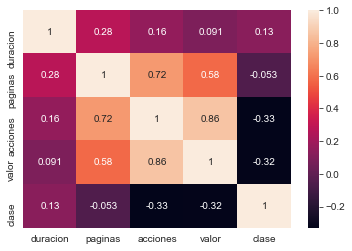

In [27]:
sns.heatmap(multi.corr(), annot = True)

Indeed, looking at the correlation matrix, the regression results are consistent since the data is practically not related to duration. The only column that is slightly related is the number of pages the software can read in the duracion period.

4. ¿Es la regresión un buen método para este dataset?

- Classification is the task of predicting a discrete class label.
- Regression is the task of predicting a continuous quantity

Ideally, this dataset should be treated with classification based on the clase column.